## 기초통계량

- mode
- median
- mean
- variance
- standard deviation
- skewness
- kurtosis

In [1]:
import json
#key:종목 / value:symbol인 딕셔너리 가져오기
stock2code = json.load(open('data/stock2code.json','r'))

naver = stock2code['NAVER']

import FinanceDataReader as fdr
data = fdr.DataReader(naver)
data

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-10-29,2312,2312,2312,2312,20549,NaN
2002-10-30,2587,2587,2558,2588,853638,0.119377
2002-10-31,2626,2689,2398,2459,1320880,-0.049845
2002-11-01,2520,2599,2215,2305,750761,-0.062627
2002-11-04,2285,2300,2135,2191,692165,-0.049458
...,...,...,...,...,...,...
2022-10-04,192000,192000,175500,176500,3753785,-0.087855
2022-10-05,170500,176000,164000,164000,6634375,-0.070822
2022-10-06,163500,169000,163000,167000,3477299,0.018293


In [2]:
#data의 간단한 통계정보 확인
data.describe()

,Open,High,Low,Close,Volume,Change
count,4933.000000,4933.000000,4933.000000,4933.000000,4.933000e+03,4932.000000
mean,112013.228461,113651.431178,110300.489763,112416.873100,3.085453e+05,0.001219
std,97541.807473,98758.086649,96237.362206,97135.297209,3.254165e+05,0.027001
min,0.000000,0.000000,0.000000,1923.000000,0.000000e+00,-0.139536
25%,44103.000000,45012.000000,43349.000000,45547.000000,1.209070e+05,-0.014382
50%,80673.000000,82083.000000,78946.000000,81708.000000,2.081690e+05,0.000000
75%,154017.000000,155821.000000,151615.000000,153818.000000,3.804510e+05,0.014656
max,460000.000000,465000.000000,452000.000000,454000.000000,6.634375e+06,0.145978


In [3]:
print("****MEDIAN****")
print(data.median())
print()

print("****산술평균****")
print(data.mean())
print()
print("****산술평균(axis=1)****")
print(data[['Open','High','Low','Close']].mean(axis=1))
print()
print("****최빈값****")
print(data.mode())
print()
print("****분산****")
print(data.var())
print()
print("****표준편차****")
print(data.std())
print()
print("****왜도****")
print(data.skew())
print()
print("****첨도****")
print(data.kurtosis())

****MEDIAN****
Open       80673.0
High       82083.0
Low        78946.0
Close      81708.0
Volume    208169.0
Change         0.0
dtype: float64

****산술평균****
Open      112013.228461
High      113651.431178
Low       110300.489763
Close     112416.873100
Volume    308545.313805
Change         0.001219
dtype: float64

****산술평균(axis=1)****
Date
2002-10-29      2312.00
2002-10-30      2580.00
2002-10-31      2543.00
2002-11-01      2409.75
2002-11-04      2227.75
                ...    
2022-10-04    184000.00
2022-10-05    168625.00
2022-10-06    165625.00
2022-10-07    162750.00
2022-10-11    157625.00
Length: 4933, dtype: float64

****최빈값****
   Open  High  Low  Close  Volume  Change
0     0     0    0  92130       0     0.0

****분산****
Open      9.514404e+09
High      9.753160e+09
Low       9.261630e+09
Close     9.435266e+09
Volume    1.058959e+11
Change    7.290487e-04
dtype: float64

****표준편차****
Open       97541.807473
High       98758.086649
Low        96237.362206
Close      9713

### 기하평균

In [4]:
#산술평균
data.Change.loc['2021-06-01':'2021-06-30'].mean()

0.006700724354720703

In [5]:
len(data.Change.loc['2021-06-01':'2021-06-30'])

22

In [6]:
#기하평균
((data.Change.loc['2021-06-01':'2021-06-30'] + 1).prod()) ** (1/22)  - 1

0.0064415705210247864

In [7]:
def geo_mean(x):
    return (x +1).prod() ** (1/len(x)) - 1

In [8]:
print("기하평균", geo_mean(data.Change))
print("산술평균", data.Change.mean())

기하평균 0.0008573796331969863
산술평균 0.0012192839974673939


## 이동평균

### 단순이동평균과 지수이동평균

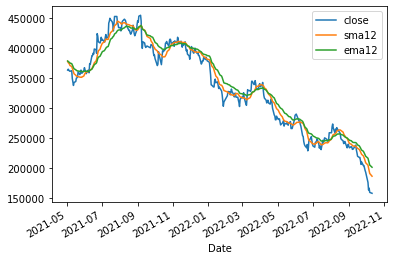

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

data.Close['2021-05-01':].plot(label='close')
data.Close.rolling(12).mean().loc['2021-05-01':].plot(label='sma12')
data.Close.ewm(12).mean().loc['2021-05-01':].plot(label='ema12')
plt.legend()
plt.show()

## 상관

- 공분산
- 상관계수

In [14]:
df1 = fdr.DataReader(stock2code['셀트리온']).Close
df2 = fdr.DataReader(stock2code['SK바이오사이언스']).Close
df = pd.concat([df1, df2], axis=1).dropna()
df.columns = ['Cellt','SKBio']

#공분산
df.cov()

,Cellt,SKBio
Cellt,2.293990e+09,1.011212e+09
SKBio,1.011212e+09,3.554237e+09


In [15]:
#상관계수
df.corr()

,Cellt,SKBio
Cellt,1.000000,0.354138
SKBio,0.354138,1.000000


In [16]:
#공분산 값과 표준편차값으로 상관계수 연산
df.cov().iloc[0,1] / (df.Cellt.std() * df.SKBio.std())

0.35413843079416285

## 회귀분석

In [33]:
!pip install scikit-learn
!pip install statsmodels

### scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [29]:
#상수항 넣어주기
index= sm.add_constant(data.index)
index

array([[1.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00],
       ...,
       [1.000e+00, 4.930e+03],
       [1.000e+00, 4.931e+03],
       [1.000e+00, 4.932e+03]])

In [30]:
model = LinearRegression(fit_intercept=True)
model.fit(index, data.Close)

LinearRegression()

In [31]:
#회귀선 기울기, 상수항
model.coef_, model.intercept_

(array([ 0.        , 59.35859024]), -33961.41042996003)

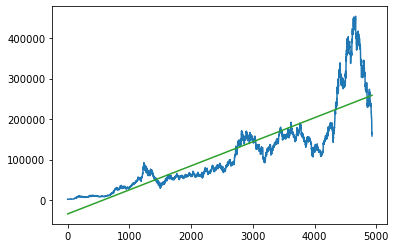

In [32]:
plt.plot(data.index, data.Close)
plt.plot(index, index * model.coef_ + model.intercept_)
plt.show()

### statsmodels

In [23]:
index = sm.add_constant(data.index)
model = sm.OLS(data.Close, index)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                 1.540e+04
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        23:46:10   Log-Likelihood:                -60155.
No. Observations:                4933   AIC:                         1.203e+05
Df Residuals:                    4931   BIC:                         1.203e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.396e+04   1362.225    -24.931      0.000   -3.66e+04   -3.13e+04
x1            59.3586      0.478    124.085      0.000      58.421      60.296
==============================================================================
Omnibus:                     1483.075   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4944.191
Skew:                           1.509   Prob(JB):                         0.00
Kurtosis:                       6.866   Cond. No.                     5.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
result.params

const   -33961.41043
x1          59.35859
dtype: float64

In [25]:
result.rsquared

0.7574291650724031

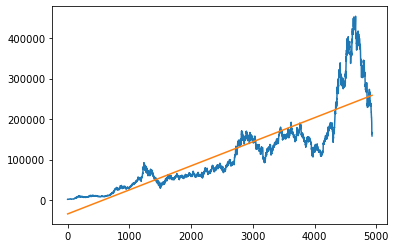

In [26]:
plt.plot(data.index, data.Close)
result.fittedvalues.plot()
plt.show()